# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Thobias Zandisko Panjaitan]
- **Email:** [thoxir058@gmail.com]
- **ID Dicoding:** [thobiazp]

## Menentukan Pertanyaan Bisnis







- Pada kondisi seperti apa yang dapat meraih akumulasi total sepeda berhasil di rental yang paling tinggi?
- Apakah terdapat penurunan atau peningkatan tren penggunaan rental sepeda dari 2011 ke 2012

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



## Data Wrangling

### Gathering Data

In [5]:
# Menerjemahkan CSV ke DF
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

# MEMBACA DF
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data terdapat kondisi suhu, tanggal, jam, musim, hari, serta total pengguna casual, pengguna terdaftar, dan total keseluruhan, dll.

### Assessing Data

In [6]:
"""
Melakukan pengecekan kedua data frame untuk dibersihkan jika terdapat kriteria data sbb :
-Duplikasi data
-Data yang kosong
-Tipe data yang kurang tepat
-Data yang inakurat
-Data yang Aneh, dll.



"""
day_df.info()
day_df.describe()
hour_df.info()
hour_df.describe()
print(day_df.isna().sum())
print(hour_df.isna().sum())
print("Jumlah Duplikat: ", day_df.duplicated().sum())
print("Jumlah Duplikat: ", hour_df.duplicated().sum())
print(hour_df.describe())
print(day_df.describe())

"""



Tidak terdapat data duplikasi ataupun data yang dengan nilai yang kosong.

Terdapat data dengan nilai tanggal namun bertipe object.


tidak ada nilai yang aneh dan inakurat. Namun, terdapat total jumlah data hour yang kurang
sinkron dengan total jumlah day

Total data day_df : 731 = 731 Hari
Total data hour_df : 17379 jam = 724 Hari


"""




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

'\n\n\n\nTidak terdapat data duplikasi ataupun data yang dengan nilai yang kosong.\n\nTerdapat data dengan nilai tanggal namun bertipe object.\n\n\ntidak ada nilai yang aneh dan inakurat. Namun, terdapat total jumlah data hour yang kurang\nsinkron dengan total jumlah day\n\nTotal data day_df : 731 = 731 Hari\nTotal data hour_df : 17379 jam = 724 Hari\n\n\n'

**Insight:**
- Hanya terdapat total data yang tidak sinkron antara dua df yang akan di cek di tahap cleaning data
- Tidak terdapat indikasi missing values, duplicated values, inaccurate values, dll
- Terdapat fitur tanggal yang bertipe object, akan dikonversi ke datetime

### Cleaning Data

In [7]:
# Mengubah tipe data dteday dari object menjadi datetime


hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])


# Mengetahui kenapa ada total value yang tidak sinkron pada kedua data
day_hour_df = pd.merge(
        left = day_df,
        right = hour_df,
        how = 'outer',
        left_on = 'dteday',
        right_on = 'dteday'

)

day_hour_df.head()


print(day_hour_df.isna().sum())

print(day_hour_df.hr.value_counts().sort_index())

'''
Pada data hour_df seharusnya terdapat 731 x 24  total data atau 17544 total data
agar sinkon dengan total data pada day_df yaitu 731 data atau 731 hari.
Namun, ternyata hal ini dapat dijelaskan dari kode diatas yang baru kita lakukan dimana
pemonitoran yang dilakukan seharusnya setiap jam setiap harinya, ternyata terdapat
dimana hari-hari tertentu pemonitoran itu tidak lakukan, atau tidak ter-record.
Bukan sebuah missing values.
'''


day_df.head()
hour_df.head()

instant_x       0
dteday          0
season_x        0
yr_x            0
mnth_x          0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
season_y        0
yr_y            0
mnth_y          0
hr              0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64
hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Total data tidak sinkron hanya dikarenakan terdapat titik jam yang tidak dimonitor

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
"""
Terdapat banyak data kategorikal yang direpresentasikan sebagai integer,
dimana maknanya sudah dijelaskan pada README.md yang disediakan di file zip
asal data tersebut. Untuk itu mari kita mempermudahkan pengolahan data dengan
mengubah tipe data integer ini ke object sesuai dengan maknanya
agar memudahkan pengolahan data.
"""


# Konversi setiap data kategorikal yang memiliki tipe data integer ke tipe data object pada hour_df
hour_df['workingday'] = hour_df.workingday.apply(lambda x:'non-working days' if x == 1 else 'workdays')
hour_df['yr'] = hour_df.yr.apply(lambda x: 2010 if x == 0 else 2011)
hour_df['season'] = hour_df.season.apply(lambda x:'springer' if x == 1 else ('summer' if x==2 else('fall' if x==3 else 'winter')))
hour_df['time_cycle'] = hour_df.hr.apply(
    lambda x: 'morning' if (x >= 4) & (x <= 11) else
              ('midday/noon' if (x >= 12) & (x <= 15) else
               ('afternoon' if (x >= 16) & (x <= 18) else 'night'))
)

# Konversi setiap data kategorikal yang memiliki tipe data integer ke tipe data object pada day_df
day_df['workingday'] = day_df.workingday.apply(lambda x:'non-working days' if x == 1 else 'workdays')
day_df['yr'] = day_df.yr.apply(lambda x: 2010 if x == 0 else 2011)
day_df['season'] = day_df.season.apply(lambda x:'springer' if x == 1 else ('summer' if x==2 else('fall' if x==3 else 'winter')))



# Mengetahui data pada time_cycle yang baru dibuat
time_cycle_df = hour_df.groupby(by='time_cycle').instant.nunique().sort_values(ascending=False)



# Mengetahui data user casual,registered, dan keseluruhan pada beberapa parameter
some_df = day_df.groupby(by='mnth').agg({
    'casual':['mean','min','max'],
    'registered':['mean','min','max'],
    'cnt':['mean','min','max']
})
some_df2 = day_df.groupby(by='season').agg({
    'casual':['mean','min','max'],
    'registered':['mean','min','max'],
    'cnt':['mean','min','max']
})

some_df.head()
some_df2.head()
time_cycle_df.head()

# Melakukan pivot untuk mengetahui akumulasi user berdasarkan data season, time cycle, working day
all_time_df = hour_df.groupby(by=['season','time_cycle','workingday']).agg({
		 'casual' : ['max','mean'],
		 'registered' : ['max','mean'],
		 'cnt' : ['max','mean','sum']
}).sort_values(ascending=False, by=('cnt','sum'))

all_time_df.columns = ['_'.join(col) for col in all_time_df.columns]
all_time_df = all_time_df.sort_values(by='cnt_sum', ascending=False)
all_time_df.head(10)
day_df['quarter'] = day_df['dteday'].dt.quarter.map({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'})


# Melakukan pivot untuk mengetahui akumulasi user berdasarkan year, dan quarter
year_qrt_df = day_df.groupby(by=['yr','quarter']).agg({
		 'casual' : ['max','mean'],
		 'registered' : ['max','mean'],
		 'cnt' : ['max','mean','sum']
}).sort_values(ascending=False, by=('cnt','mean'))


year_qrt_df.columns = ['_'.join(col) for col in year_qrt_df.columns]
year_qrt_df = year_qrt_df.sort_index(level=['yr', 'quarter'], ascending=[True, True])

all_time_df.head()
year_qrt_df.head()

casual_max  casual_mean  registered_max  registered_mean  \
yr   quarter                                                             
2010 Q1             1424   246.011111            2355      1425.644444   
     Q2             2355   923.164835            4488      3188.956044   
     Q3             3065   998.250000            4614      3408.815217   
     Q4             2397   535.478261            4267      2866.706522   
2011 Q1             3155   541.846154            5893      3466.461538   

              cnt_max     cnt_mean  cnt_sum  
yr   quarter                                 
2010 Q1          3239  1671.655556   150449  
     Q2          5805  4112.120879   374203  
     Q3          6043  4407.065217   405450  
     Q4          5511  3402.184783   313001  
2011 Q1          8362  4008.307692   364756

**Insight:**
- Terdapat potensi pengelompokkan waktu berdasrkan musim, siklus waktu, dan hari kerja atau tidak, yang sudah kita kelompokkan lalu sudah kita operasikan agar kita mengetahui yang mana yang terdapat total penggunaan sepeda rental terbanyak. Jika pada musim maka kita mendapatkan fall. Jika pada time cycle maka kita mendapatkan morning
-Terdapat potensi dimana kita bisa mengetahui apakah terdapat gejolak tren yang signifikan antara 2010 dan 2011

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\User\AppData\Local\Temp\ipykernel_4292\4010443390.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_4292\4010443390.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


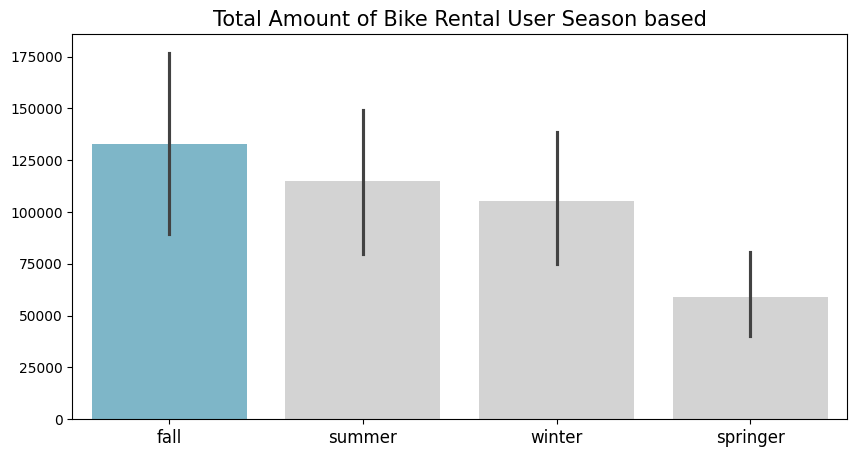

C:\Users\User\AppData\Local\Temp\ipykernel_4292\4010443390.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_4292\4010443390.py:27: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


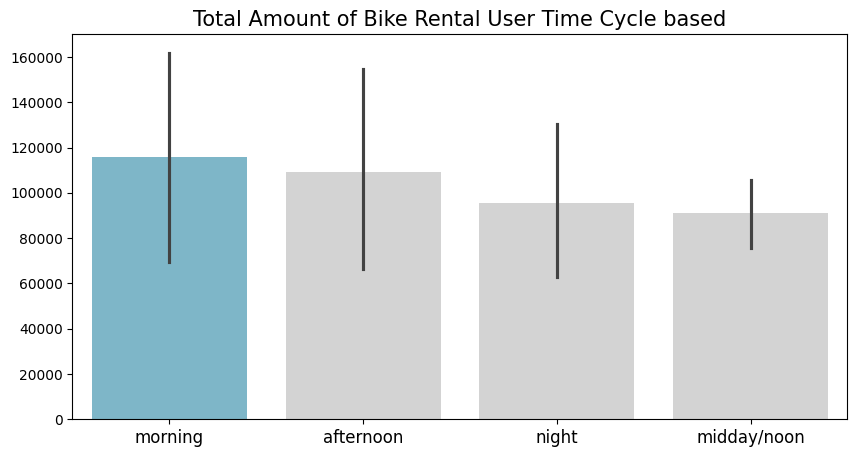

In [10]:
# Visualisasi data mencari tau total jumlah sepeda yang berhasil dirental berdasarkan musim
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

all_time_df.rename(columns={
    "cnt_sum": "total_customer"
}, inplace=True)

all_time_df.reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(
  y="total_customer",
  x="season",
  data=all_time_df.sort_values(by="total_customer", ascending=False),
  palette=colors
)
plt.title("Total Amount of Bike Rental User Season based", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

# Visualisasi data mencari tau total jumlah sepeda yang berhasil dirental berdasarkan siklus waktu
plt.figure(figsize=(10, 5))

sns.barplot(
  y="total_customer",
  x="time_cycle",
  data=all_time_df.sort_values(by="total_customer", ascending=False),
  palette=colors
)
plt.title("Total Amount of Bike Rental User Time Cycle based", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()



### Pertanyaan 2:

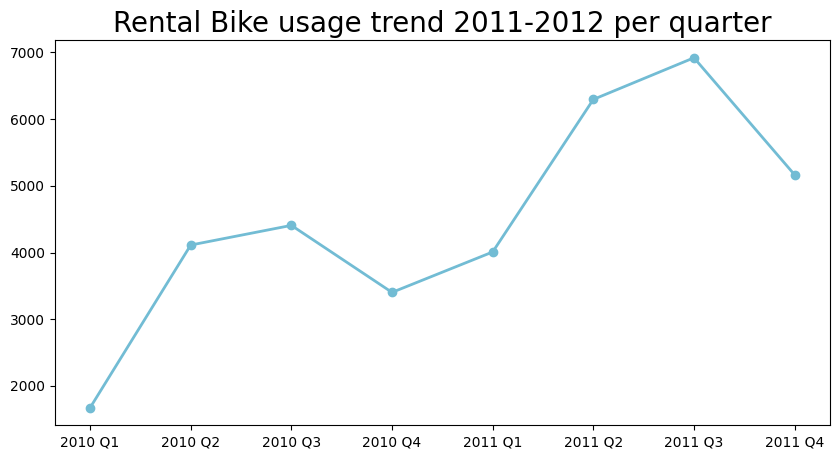

In [106]:
# Visualisasi data mencari tren penggunaan sepeda rental antara 2011 - 2012 berdarkan rata-rata pada tiap tahun per quartal
year_qrt_df['yearnquarter'] = year_qrt_df.index.get_level_values('yr').astype(str) + ' ' + year_qrt_df.index.get_level_values('quarter')
year_qrt_df.reset_index()
year_qrt_df.head(10)

plt.figure(figsize=(10, 5))
plt.plot(year_qrt_df["yearnquarter"], year_qrt_df["cnt_mean"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Rental Bike usage trend 2011-2012 per quarter", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

year_qrt = year_qrt_df.reset_index()
all_time = all_time_df.reset_index()
year_qrt.to_csv("time_qtr.csv", index=False)
all_time.to_csv("all_time.csv", index=False)

**Insight:**
- Tahun 2011 penggunaan sepeda rental mengalami kenaikkan yang cukup signifikan, dengan peak 2011 hampir menyentuh 2 kali lipat peak pada 2010.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berarti kondisi waktu yang dimana total penggunaan rental sepeda di titik paling tinggi jatuh pada fall/musim gugut jika berdasarkan musim dan pagi jika berdasarkan siklus waktu, mengindikasikan pengguna lebih nyaman memakai sepeda pada kondisi waktu seperti itu.
- Pada 2012 trend penggunaan rental sepeda mengalami kenaikkan yang cukup signifikan, namun tidak konsisten, dimana ini mungkin berindikasi bahwa di masa depan, tren ini tidak akan berlanjut seperti ini.